In [4]:
#Imputs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline

In [5]:
#Read the data
X = pd.read_csv('train.csv', index_col = 'Id')
X_test = pd.read_csv('test.csv', index_col ='Id')

#Filter from target column null values
X.dropna(axis = 0, subset = ['SalePrice'], inplace = True)
y = X['SalePrice']

#Filter out the target column from X dataset
X.drop(axis = 1, labels = ['SalePrice'], inplace = True)

In [8]:
#Verify if there are the same number of columns in both test and train data
print(X.shape)
print((X.columns == X_test.columns).sum())

(1460, 79)
79


In [10]:
X.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [12]:
# MoSold, YrSOld, SaleType, SaleCondition won't be available for a prediction for the new house
#so these columns will be dropped
leakage_columns = ['MoSold', 'YrSold', 'SaleType', 'SaleCondition']
X.drop(labels = leakage_columns, axis = 1, inplace = True)
X_test.drop(labels = leakage_columns, axis = 1, inplace= True)

In [14]:
numerical_cols = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]

cols_with_nulls = X[numerical_cols].isnull().sum()
print(cols_with_nulls[cols_with_nulls > 0])

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64


In [16]:
sns.set_style('whitegrid')
df = X[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].dropna(axis = 0)

/tmp/ipykernel_143/2223159185.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a = df['LotFrontage'], bins = 30, norm_hist=False, kde=True, color = 'blue')
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='LotFrontage', ylabel='Density'>

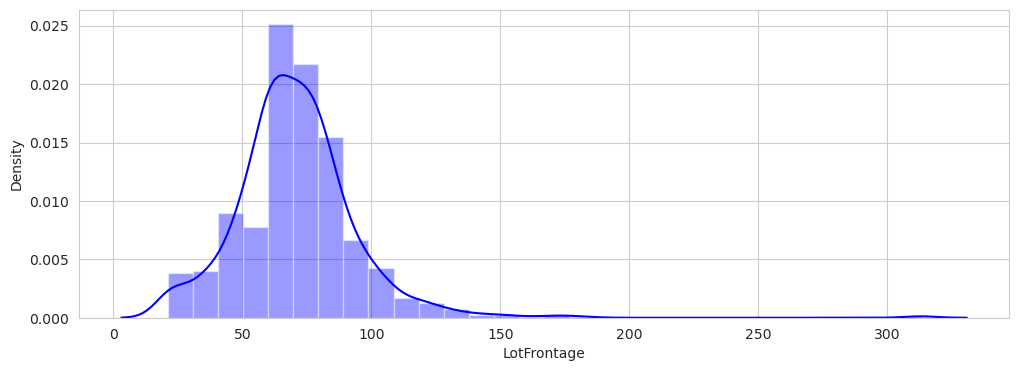

In [18]:
#we'll impute the mode, as the distributions is asymetric and the mean is influenced by outliers
plt.figure(figsize = (12,4))
sns.distplot(a = df['LotFrontage'], bins = 30, norm_hist=False, kde=True, color = 'blue')

/tmp/ipykernel_143/2841420247.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a = df['MasVnrArea'], bins = 30, norm_hist=False, kde=True, color = 'purple')
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='MasVnrArea', ylabel='Density'>

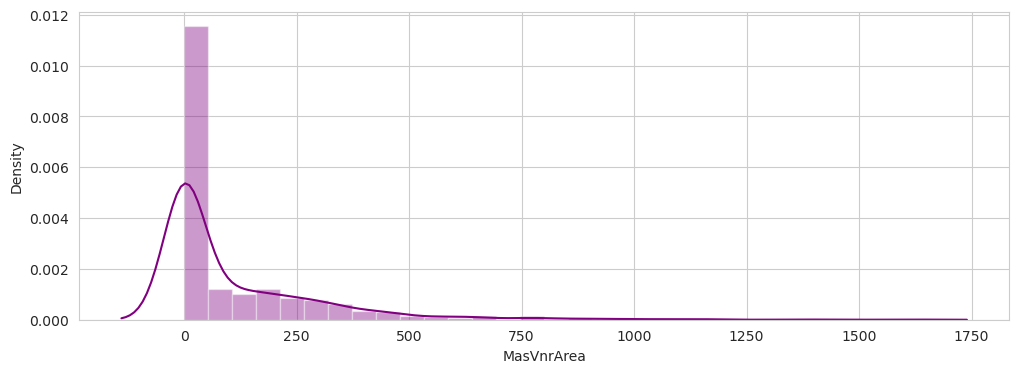

In [20]:
#we'll use most frequent, as the distribution is strongly asymetric to the right
plt.figure(figsize = (12,4))
sns.distplot(a = df['MasVnrArea'], bins = 30, norm_hist=False, kde=True, color = 'purple')

/tmp/ipykernel_143/683821472.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a = df['GarageYrBlt'], bins = 30, norm_hist=False, kde=True, color = 'orange')
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='GarageYrBlt', ylabel='Density'>

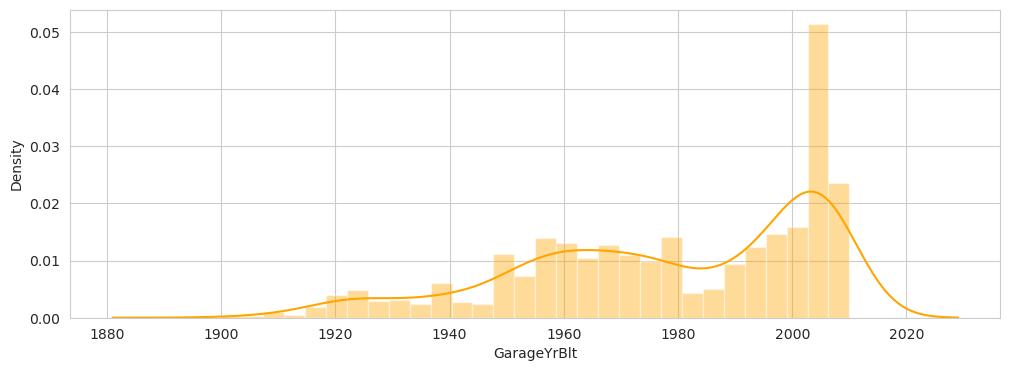

In [22]:
#for this distribution mean should work just fine :)
plt.figure(figsize = (12,4))
sns.distplot(a = df['GarageYrBlt'], bins = 30, norm_hist=False, kde=True, color = 'orange')

In [24]:
#There are only 3 columns with missing values, and they are small in number, so we'll apply Simple Imputation
from sklearn.impute import SimpleImputer

numerical_cols_median = ['LotFrontage']
numerical_transformer_median = SimpleImputer(strategy = 'median')

numerical_cols_mod = ['MasVnrArea']
numerical_transformer_mod = SimpleImputer(strategy = 'most_frequent')

numerical_cols_mean = ['GarageYrBlt']
numerical_transformer_mean = SimpleImputer(strategy = 'mean')

numerical_cols_remain = set(numerical_cols) - set(numerical_cols_mean) - set(numerical_cols_median) - set(numerical_cols_mod)
numerical_cols_remain = list(numerical_cols_remain)

In [26]:
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
cols_with_nulls_categs = X[categorical_cols].isnull().sum()
cols_with_nulls_categs[cols_with_nulls_categs > 0]

Alley           1369
MasVnrType       872
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [28]:
#Because there are a few columns with too many missing values, we'll filter them out from the data
X.drop(labels = ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1, inplace = True)
X_test.drop(labels = ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1, inplace = True)

In [30]:
#Redo categorical_cols
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
X.shape

(1460, 70)

In [32]:
from sklearn.preprocessing import OneHotEncoder

categ_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy = 'most_frequent')),
                                         ('onehot', OneHotEncoder(handle_unknown = 'ignore'))])

In [34]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(transformers=[('num_median', numerical_transformer_median, numerical_cols_median),
                                               ('num_mod', numerical_transformer_mod, numerical_cols_mod),
                                               ('num_mean', numerical_transformer_mean, numerical_cols_mean),
                                               ('num_rest', numerical_transformer_mean, numerical_cols_remain),
                                              ('cat', categ_transformer, categorical_cols)])

In [36]:
#split the training data into train & valid
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [38]:
from xgboost import XGBRegressor
xgboost_1 = XGBRegressor(learning_rate = 0.05, n_estimators=1000, random_state=0)
pipeline_1 = Pipeline(steps=[('preprocessor', preprocessor),
                            ('model', xgboost_1)])
pipeline_1.fit(X_train, y_train)
preds_1 = pipeline_1.predict(X_valid)
mae = mean_absolute_error(y_valid, preds_1)
print('MAE 1:', mae)

MAE 1: 16639.42548694349


In [40]:
X_train_prep = preprocessor.fit_transform(X_train)

In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = {'learning_rate' : [0.1, 0.08, 0.05, 0.03, 0.01], 'n_estimators' : [50, 100, 200, 500, 700, 1000]}
grid = GridSearchCV(XGBRegressor(), param_grid, cv = 5, verbose=5)

grid.fit(X_train_prep, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END learning_rate=0.1, n_estimators=50;, score=0.720 total time=   0.2s
[CV 2/5] END learning_rate=0.1, n_estimators=50;, score=0.894 total time=   0.2s
[CV 3/5] END learning_rate=0.1, n_estimators=50;, score=0.859 total time=   0.2s
[CV 4/5] END learning_rate=0.1, n_estimators=50;, score=0.843 total time=   0.2s
[CV 5/5] END learning_rate=0.1, n_estimators=50;, score=0.900 total time=   0.2s
[CV 1/5] END learning_rate=0.1, n_estimators=100;, score=0.688 total time=   0.3s
[CV 2/5] END learning_rate=0.1, n_estimators=100;, score=0.896 total time=   0.2s
[CV 3/5] END learning_rate=0.1, n_estimators=100;, score=0.871 total time=   0.5s
[CV 4/5] END learning_rate=0.1, n_estimators=100;, score=0.842 total time=   0.3s
[CV 5/5] END learning_rate=0.1, n_estimators=100;, score=0.906 total time=   0.5s
[CV 1/5] END learning_rate=0.1, n_estimators=200;, score=0.686 total time=   0.5s
[CV 2/5] END learning_rate=0.1, n_estimat

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.08, 0.05, 0.03, 0.01],
                         'n_estimators': [50, 100, 200, 500, 700, 1000]},
             verbose=5)

In [44]:
print('Best params:', grid.best_params_)
print('Best estim:', grid.best_estimator_)
print('Best score:', grid.best_score_)

Best params: {'learning_rate': 0.01, 'n_estimators': 500}
Best estim: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
Best score: 0.8488364759592846


In [46]:
xgboost_2 = XGBRegressor(learning_rate=0.01, n_estimators= 1000)

pipeline_2 = Pipeline(steps=[('preprocessor', preprocessor),
                            ('model', xgboost_2)])

pipeline_2.fit(X_train, y_train)

preds_2 = pipeline_2.predict(X_valid)
mae = mean_absolute_error(y_valid, preds_2)
print('MAE 2:', mae)

MAE 2: 16552.90435930365
